# Regresion Trees

Usaremos el dataset de Boston Housing para nuestro ejemplo de regresión. Este es un dataset muy popular que contiene información sobre casas en los suburbios de Boston. Hay 506 muestras y 14 atributos. Por motivos de simplicidad y visualización, solo usaremos dos: MEDV (valor medio de las viviendas ocupadas por el propietario en $ 1000) como objetivo y LSTAT (porcentaje de menor estatus de la población) como característica.

In [18]:
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import seaborn as sns

In [19]:
boston = pd.read_csv("https://raw.githubusercontent.com/rdambrosioz/aa_2021/main/ClaseMetodosBasadosEnArboles/HousingData.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [20]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [22]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [23]:
# La variable CHAS no es categoric => la convertimos 

boston['CHAS']=boston['CHAS'].astype(object)
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


In [24]:
# Tratamos los valores que nos faltan

# Reemplazamos los valores faltantes por el promedio
boston[['CRIM','ZN','INDUS','AGE','LSTAT']] = boston[['CRIM','ZN','INDUS','AGE','LSTAT']].fillna((boston[['CRIM','ZN','INDUS','AGE','LSTAT']].mean()))

# Utilizamos el metodo 'bfill'
boston['CHAS']=boston['CHAS'].fillna(method='bfill')

<Figure size 1440x1440 with 0 Axes>

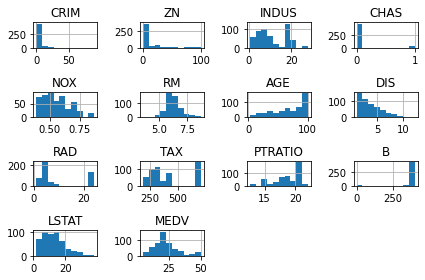

In [25]:
plt.figure(figsize=(20,20))
boston.hist()
plt.tight_layout()
plt.show()

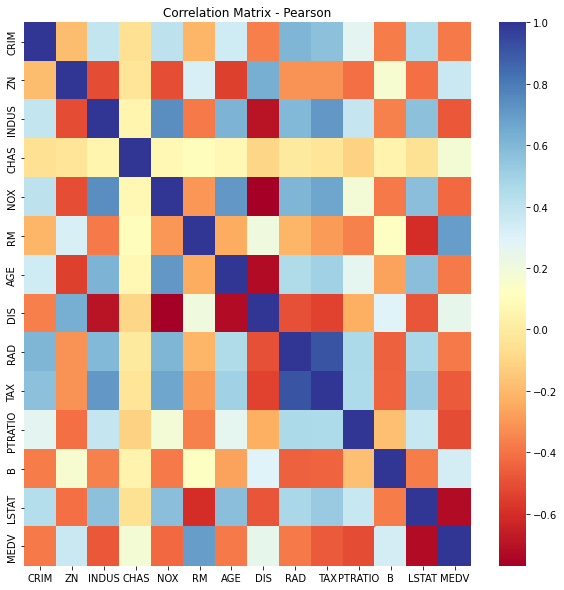

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(boston.corr(method='pearson'), cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Pearson')
plt.show()

In [27]:
# Spliteamos en los vectores X e Y

X = boston.iloc[:,0:-1]
Y = boston.iloc[:,-1]

In [28]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432


In [29]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [31]:
regressor = DecisionTreeRegressor(max_depth = 6)
DT_reg = regressor.fit(X_train, Y_train)

In [32]:
DT_reg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
print (DT_reg.score(X_train,Y_train))
print (DT_reg.score(X_test,Y_test))

0.9473550516257327
0.6497856054712673


In [34]:
Y_pred = DT_reg.predict(X_test)
Y_pred

array([24.93166667, 24.93166667, 20.77021277, 13.25238095, 20.77021277,
       20.81764706, 20.77021277, 20.81764706, 20.77021277, 20.77021277,
        9.61111111, 17.55      , 13.25238095,  6.58333333, 48.5       ,
       33.65555556, 20.77021277, 34.78888889, 24.93166667, 20.81764706,
       24.93166667, 20.77021277, 20.77021277, 24.93166667, 20.77021277,
       20.77021277, 20.77021277, 16.59583333, 40.75      , 19.8375    ,
       13.25238095, 13.25238095, 20.77021277, 20.77021277, 24.93166667,
       16.59583333,  9.61111111, 24.575     , 16.59583333, 17.55      ,
       20.81764706, 20.77021277, 24.93166667, 13.25238095, 24.93166667,
       24.93166667, 18.95      , 16.59583333, 15.168     , 24.93166667,
       16.59583333, 19.8375    , 20.77021277, 35.2       , 16.59583333,
       23.525     , 20.77021277, 20.77021277, 12.2       , 20.15555556,
       20.81764706, 20.77021277, 33.65555556, 33.75      , 13.25238095,
       33.75      , 16.59583333, 20.15555556, 50.        , 20.77

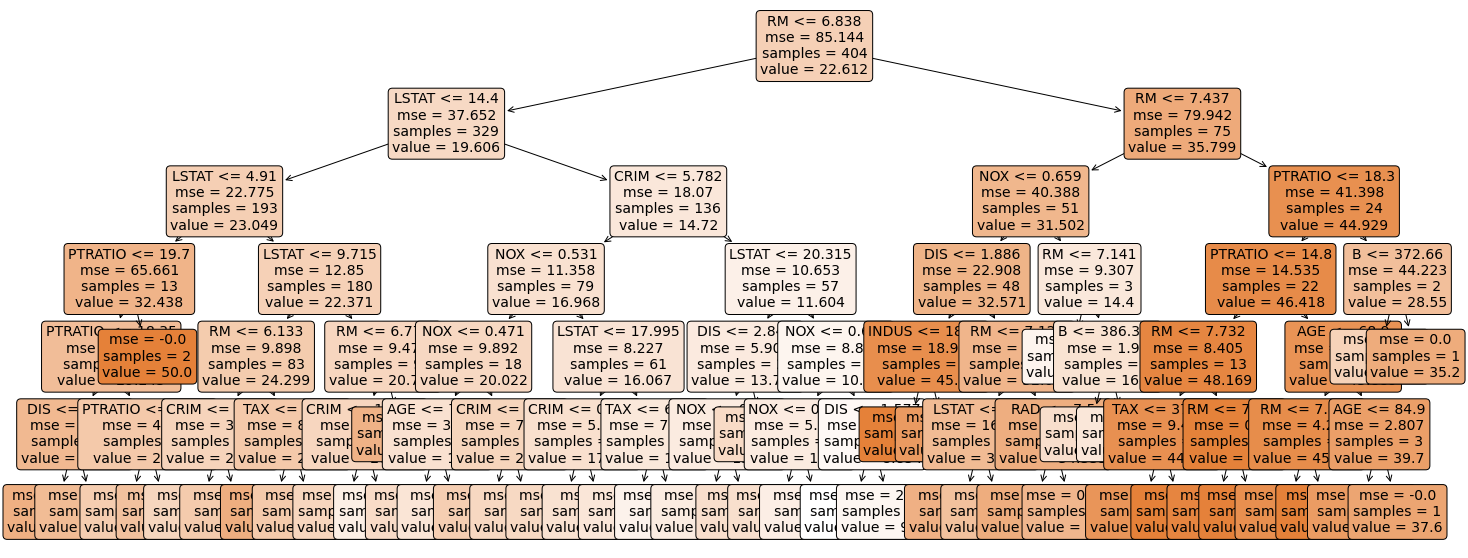

In [35]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=X.columns, 
              class_names=Y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

Probamos cambiar el max_depth con 4,5,6,7 de los cuales max_depth = 6 nos dio la puntuación más alta en los datos de la prueba.